# Testing Transport and EOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from constants import *
from physics import JT_GMS, SMT

from pandas import read_csv
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# CHECK out SMT for λ_dB

# Transport Coefficients

## Electron Thermal Conductivity (Double Check!!!)

#### Carbon from TCCW
We first test our conductivity via comparison with results from TCCW
### "Review of the first charged-particle transport coefficient comparison workshop"
Grabowski et al.


#### The following plot is for $\rho=1$ g/cc

In [2]:
Te = np.geomspace(0.1,1e5)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12

m_i = m_p*A

rho = 1e0*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

ke_tccw_rho1_data = read_csv("/home/zach/plasma/datasets/tccw-1/ke_rho_1e0-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [1.45620556 1.45724953 1.45861413 1.46039694 1.46272466 1.46576131
 1.46971858 1.47486852 1.48155883 1.49023102 1.50144108 1.51588263
 1.53441199 1.55807636 1.58814966 1.62619086 1.67416074 1.73467245
 1.8115091  1.91058363 2.04138363 2.21820467 2.45864341 2.77545442
 3.16310097 3.5920403  4.0207827  4.41445493 4.75388242 5.03400331
 5.2584137  5.43461397 5.57107271 5.67575166 5.75551584 5.81600576
 5.86172128 5.89618462 5.92211775 5.9416057  5.95623568 5.96721055
 5.97543897 5.98160569 5.98622589 5.98968661 5.99227839 5.99421917
 5.99567232 5.99676028]


Below we see agreement between SMT and JT_GMS models at very high T, well above the region TCCW probed. The behaviour difference is essentially due to the extremely small $\rm{ln}\Lambda$ parameter, which at the far left of this graph is $\sim 10^{-3}$, representing such strong screening that the idea of a Debye screening length must be completely broken. Most of the graph is extremely sensitive to exactly what is put in the lnΛ. 

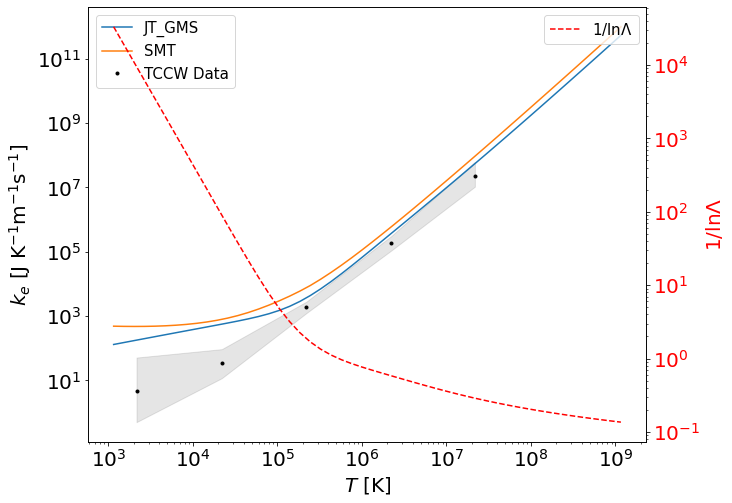

In [3]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.tick_params(labelsize=20)

ax.legend(fontsize=15)

# ax.grid()

In [4]:
λdB = JT_GMS.electron_deBroglie_wavelength(n_e, Te)
v_F = JT_GMS.Fermi_velocity(n_e, m_e)

np.where(0.6*v_F**2>3*k_B*Te/m_e, Te, 0)


array([1.15942029e+03, 1.53705666e+03, 2.03769348e+03, 2.70139340e+03,
       3.58126794e+03, 4.74772761e+03, 6.29411645e+03, 8.34418172e+03,
       1.10619765e+04, 1.46649880e+04, 1.94415413e+04, 2.57738723e+04,
       3.41687154e+04, 4.52978543e+04, 6.00518803e+04, 7.96114603e+04,
       1.05541818e+05, 1.39917987e+05, 1.85490866e+05, 2.45907349e+05,
       3.26002168e+05, 4.32184779e+05, 5.72952274e+05, 7.59569341e+05,
       1.00696971e+06, 1.33495119e+06, 1.76975996e+06, 2.34619090e+06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [5]:
λ = JT_GMS.electron_classical_quantum_wavelength(n_e, Te)
r_c =  ee**2 /(4*π*ε_0) / (3*k_B*Te)
np.where( λ > r_c, Te, 0 )

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.96114603e+04,
       1.05541818e+05, 1.39917987e+05, 1.85490866e+05, 2.45907349e+05,
       3.26002168e+05, 4.32184779e+05, 5.72952274e+05, 7.59569341e+05,
       1.00696971e+06, 1.33495119e+06, 1.76975996e+06, 2.34619090e+06,
       3.11037194e+06, 4.12345543e+06, 5.46651173e+06, 7.24701672e+06,
       9.60745244e+06, 1.27367089e+07, 1.68851997e+07, 2.23849012e+07,
       2.96759179e+07, 3.93417017e+07, 5.21557411e+07, 6.91434587e+07,
       9.16642691e+07, 1.21520363e+08, 1.61100927e+08, 2.13573330e+08,
       2.83136591e+08, 3.75357396e+08, 4.97615566e+08, 6.59694612e+08,
       8.74564645e+08, 1.15942029e+09])

In [6]:
λDb = JT_GMS.electron_Debye_length(n_e, Te)
ae  = JT_GMS.r_WignerSeitz(n_e)
np.log10(np.where(ae>λDb, Te, 0))


/tmp/ipykernel_85660/1249975340.py:3: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.where(ae>λDb, Te, 0))


array([3.0642409 , 3.18668988, 3.30913886, 3.43158784, 3.55403681,
       3.67648579, 3.79893477, 3.92138375, 4.04383273, 4.16628171,
       4.28873069, 4.41117967, 4.53362865, 4.65607763, 4.77852661,
       4.90097559, 5.02342457, 5.14587355, 5.26832253, 5.39077151,
       5.51322049,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf])

#### The following plot is for $\rho=1$ g/cc

In [7]:
Te = np.geomspace(0.1,1e6)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12
m_i = m_p*A

rho = 1e2*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3

Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)


ke_tccw_rho1_data = read_csv("/home/zach/plasma/datasets/tccw-1/ke_rho_1e2-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [4.29830777 4.29831276 4.29831959 4.29832894 4.29834174 4.29835928
 4.2983833  4.29841619 4.29846124 4.29852298 4.29860764 4.29872393
 4.29888417 4.29910641 4.29941858 4.29986777 4.30054298 4.30163313
 4.30357977 4.30747906 4.31611577 4.33642487 4.38413975 4.48688997
 4.66849961 4.91137453 5.16082553 5.37548896 5.54370221 5.66975975
 5.76223445 5.82934181 5.87774817 5.91253821 5.93748359 5.95534198
 5.96811292 5.9772388  5.98375649 5.98840965 5.99173078 5.99410073
 5.99579169 5.99699808 5.9978587  5.99847262 5.99891054 5.99922291
 5.99944572 5.99960465]


Now repeated for a lower density, we see a similar issue

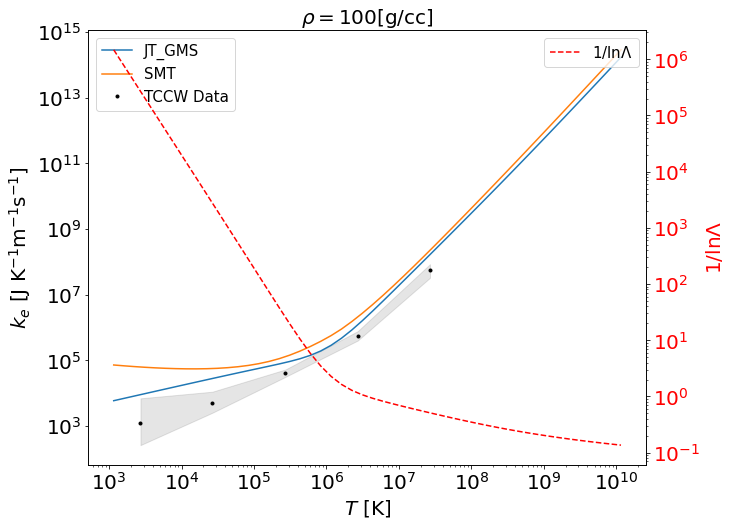

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.tick_params(labelsize=20)
ax.legend(fontsize=15)
ax.set_title(r'$\rho=100$[g/cc]',fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

# ax.grid()

In [9]:
λ = JT_GMS.electron_classical_quantum_wavelength(n_e, Te)
r_c =  ee**2 /(4*π*ε_0) / (3*k_B*Te)
np.where( λ > r_c, Te, 0 )

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.32184779e+05, 6.00518803e+05,
       8.34418172e+05, 1.15942029e+06, 1.61100927e+06, 2.23849012e+06,
       3.11037194e+06, 4.32184779e+06, 6.00518803e+06, 8.34418172e+06,
       1.15942029e+07, 1.61100927e+07, 2.23849012e+07, 3.11037194e+07,
       4.32184779e+07, 6.00518803e+07, 8.34418172e+07, 1.15942029e+08,
       1.61100927e+08, 2.23849012e+08, 3.11037194e+08, 4.32184779e+08,
       6.00518803e+08, 8.34418172e+08, 1.15942029e+09, 1.61100927e+09,
       2.23849012e+09, 3.11037194e+09, 4.32184779e+09, 6.00518803e+09,
       8.34418172e+09, 1.15942029e+10])

In [10]:
λDb = JT_GMS.electron_Debye_length(n_e, Te)
ae  = JT_GMS.r_WignerSeitz(n_e)
np.log10(np.where(ae>λDb, Te, 0))


/tmp/ipykernel_85660/1249975340.py:3: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.where(ae>λDb, Te, 0))


array([3.0642409 , 3.20709804, 3.34995518, 3.49281232, 3.63566947,
       3.77852661, 3.92138375, 4.0642409 , 4.20709804, 4.34995518,
       4.49281232, 4.63566947, 4.77852661, 4.92138375, 5.0642409 ,
       5.20709804, 5.34995518, 5.49281232, 5.63566947, 5.77852661,
       5.92138375, 6.0642409 , 6.20709804, 6.34995518,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf])

### Argon for CLAMS Experiment

We repeat, but for parameters of interest to CLAMS

In [37]:
Te = np.geomspace(300, Te_exp) #K
Ti = Te #K

Z, A = 18, 40

m_i = m_p*A

n_i = 6.3e26
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Zstar is:  [0.22453552 0.2266602  0.22894927 0.23141453 0.23406856 0.23692466
 0.23999694 0.24330033 0.24685059 0.25066437 0.2547592  0.25915356
 0.26386688 0.26891955 0.27433298 0.28012959 0.28633286 0.29296732
 0.30005861 0.30763347 0.31571977 0.32434653 0.33354394 0.3433434
 0.35377751 0.3648801  0.37668627 0.38923238 0.40255612 0.41669647
 0.43169375 0.44758965 0.46442722 0.48225091 0.50110656 0.52104141
 0.54210411 0.56434472 0.58781469 0.61256686 0.63865543 0.6661359
 0.69506508 0.72550101 0.75750291 0.79113107 0.82644681 0.86351235
 0.90239071 0.94314557]


We see an identical issue here, with agreement only well above the region we are interested in. One could say CLAMS 'favors' JT_GMS here, but really this is probably accidental, since the two models should be at least close. I still can't rule out a bug.

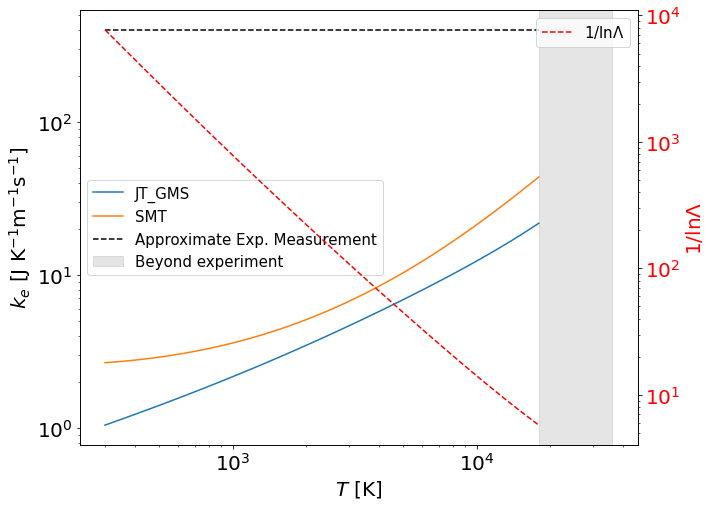

In [38]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')

dTdt_exp, Te_exp = 350e9, 18000 # 350 K/ns
τdiff    = (Te_exp/dTdt_exp) #s
ax.plot(Te, (k_B*n_e[np.argmin(np.abs(Te-Te_exp))]*(50e-6)**2/τdiff)*np.ones_like(Te) ,'k--', label='Approximate Exp. Measurement')

# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)


# ax.vlines(Te_exp,0,1e10,'k', label=r'$T_e$ experiment ')
ax.axvspan(Te_exp,2*Te[-1],color='k',alpha=0.1, label=r'Beyond experiment ')
ax.tick_params(labelsize=20)
ax.legend(fontsize=15)


ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20, color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')



# ax.grid()

In [40]:
print(JT_GMS.Theta(n_e,Te))
print(π**2/3*JT_GMS.Theta(n_e,Te))

[0.00661165 0.00714285 0.00771349 0.00832605 0.0089831  0.00968731
 0.01044148 0.01124845 0.0121112  0.01303278 0.01401633 0.01506509
 0.01618236 0.01737157 0.0186362  0.01997985 0.0214062  0.02291904
 0.02452227 0.0262199  0.0280161  0.02991518 0.03192159 0.03404
 0.03627527 0.0386325  0.04111704 0.04373454 0.04649095 0.04939257
 0.05244609 0.05565861 0.0590377  0.0625914  0.06632828 0.07025751
 0.07438887 0.07873278 0.08330039 0.08810363 0.09315522 0.09846877
 0.10405882 0.10994091 0.11613166 0.12264881 0.12951135 0.13673956
 0.14435515 0.1523813 ]
[0.02175144 0.02349903 0.02537637 0.0273916  0.0295532  0.03186999
 0.03435108 0.03700592 0.03984425 0.04287613 0.04611188 0.04956214
 0.05323784 0.05715017 0.06131065 0.06573108 0.07042358 0.07540062
 0.08067502 0.08626002 0.09216929 0.09841698 0.10501782 0.1119871
 0.11934085 0.12709583 0.13526965 0.14388087 0.15294908 0.16249503
 0.17254071 0.1831095  0.19422625 0.20591744 0.2182113  0.23113796
 0.24472956 0.25902045 0.27404731 0.289849

In [13]:
λ = JT_GMS.electron_classical_quantum_wavelength(n_e, Te)
r_c =  ee**2 /(4*π*ε_0) / (3*k_B*Te)
np.where( λ > r_c, Te, 0 )

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47162929e+04,
       1.90770067e+04, 2.47298820e+04, 3.20578103e+04, 4.15571414e+04,
       5.38713027e+04, 6.98343811e+04, 9.05276193e+04, 1.17352653e+05,
       1.52126447e+05, 1.97204369e+05, 2.55639726e+05, 3.31390577e+05,
       4.29587827e+05, 5.56882765e+05, 7.21897584e+05, 9.35809392e+05,
       1.21310729e+06, 1.57257375e+06, 2.03855688e+06, 2.64261955e+06,
       3.42567734e+06, 4.44076986e+06, 5.75665334e+06, 7.46245781e+06,
       9.67372417e+06, 1.25402303e+07, 1.62561359e+07, 2.10731342e+07,
       2.73174995e+07, 3.54121875e+07, 4.59054836e+07, 5.95081402e+07,
       7.71415194e+07, 1.00000000e+08])

In [14]:
λDb = JT_GMS.electron_Debye_length(n_e, Te)
ae  = JT_GMS.r_WignerSeitz(n_e)
np.log10(np.where(ae>λDb, Te, 0))


/tmp/ipykernel_85660/1249975340.py:3: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.where(ae>λDb, Te, 0))


array([2.47712125, 2.58983307, 2.70254488, 2.81525669, 2.9279685 ,
       3.04068031, 3.15339212, 3.26610393, 3.37881574, 3.49152755,
       3.60423937, 3.71695118, 3.82966299, 3.9423748 , 4.05508661,
       4.16779842, 4.28051023, 4.39322204, 4.50593386, 4.61864567,
       4.73135748, 4.84406929,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf])

# Implement Rozsnyai paper Al 2.7g/cc

In [30]:
Te = np.geomspace(0.1,1e5)/K_to_eV #K
Ti = Te #K

Z, A = 13, 27

m_i = m_p*A

rho = 2.7*1e3 # 2.7 g/cc
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Roz_Te, Roz_ke = np.array([[0.026012289059673396, 18554497.53188056],
[0.1852922021640952, 24447547.247264758],
[0.8930851274991436, 32772382.97867467],
[2.371373705661655, 52197182.20435652],
[6.906940492102073, 137056108.24676672],
[15.085907086001777, 335894744.3068179],
[32.6131581998775, 837518969.4500515],
[63.61674269215422, 2124578231.0305717],
[119.09481582664222, 8012043812.766009],
[229.936090438267, 34089475627.292057],
[497.0826116437389, 175327591700.68683],
[1000, 696274914554.8905]]).T
Roz_Te = Roz_Te/K_to_eV
Roz_ke = Roz_ke*100/(1e3/K_to_eV)


Zstar is:  [ 2.44814642  2.44959977  2.4515005   2.45398548  2.45723294  2.46147444
  2.46701025  2.4742285   2.48362904  2.4958524   2.5117141   2.53224412
  2.55872987  2.59275995  2.63626402  2.691543    2.76128523  2.84857165
  2.95689306  3.0902433   3.25342222  3.45278131  3.69772887  4.0031956
  4.39240528  4.89680212  5.54654649  6.34795989  7.26231088  8.21250681
  9.11700089  9.91938757 10.59542936 11.1449226  11.58070818 11.92054883
 12.18250679 12.38279716 12.53505876 12.65033269 12.73734426 12.80288004
 12.85216187 12.8891774  12.9169555  12.93778794 12.95340389 12.96510538
 12.9738713  12.98043679]


Below we see agreement between SMT and JT_GMS models at very high T, well above the region TCCW probed. The behaviour difference is essentially due to the extremely small $\rm{ln}\Lambda$ parameter, which at the far left of this graph is $\sim 10^{-3}$, representing such strong screening that the idea of a Debye screening length must be completely broken. Most of the graph is extremely sensitive to exactly what is put in the lnΛ. 

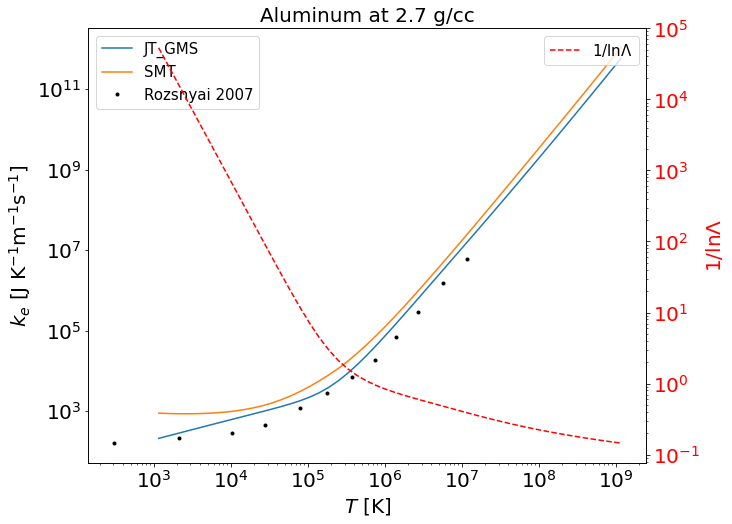

In [35]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(Roz_Te, Roz_ke,'k.', label="Rozsnyai 2007")
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.set_title("Aluminum at 2.7 g/cc",fontsize=20)
ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.tick_params(labelsize=20)

ax.legend(fontsize=15)

# ax.grid()